In [4]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from  mpl_toolkits.mplot3d import Axes3D

In [5]:
dataset = pd.read_csv('D:\potential-enigma-master\student.csv')

In [6]:
print(dataset.head())

   Math  Reading  Writing
0    48       68       63
1    62       81       72
2    79       80       78
3    76       83       79
4    59       64       62


In [7]:
math = dataset['Math'].values
read =dataset['Reading'].values
write = dataset['Writing'].values

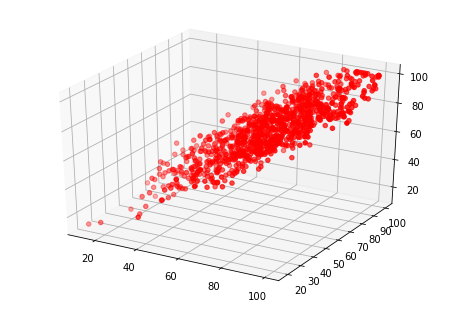

In [8]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(math,read,write,color='Red')
plt.show()

# Y =  a + bX1 +cX2 + dX3 ........nXn

### use matrix to solve above equation

# Y = (B pow T )X

## B = { a,b,c,d...........n}
##  X= {x1 , x2 , x3....xn }

In [9]:
n = len(math)
X0 = np.ones(n)

X = np.array([X0,math,read]).T
B = np.array([0,0,0])
Y = np.array(write)

alpha = 0.0001

In [14]:
def cost_function(X, Y , B):
    n = len(Y)
    j = np.sum((X.dot(B) - Y)**2)/(2*n)
    return j

# Hypothesis: hβ(x)=(β pow T)x

# Loss: (hβ(x)−y)

# Gradient: (hβ(x)−y)xj

# Gradient Descent Updation: βj:=βj−α(hβ(x)−y)xj)

In [15]:
inital_cost= cost_function(X,Y,B)
print(inital_cost)

2470.11


In [16]:
def gradient_descent( X , Y , B , alpha , iterations ):
    cost_history = [0]*iterations
    n = len(Y)
    
    for i in range(iterations):
         # Hypothesis Values
        h = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / n
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        # New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[i] = cost
        
    return B, cost_history
    

### compute final value of β

In [17]:
newB , cost_history = gradient_descent(X , Y, B , alpha , 100000)

In [19]:
print(newB)
print(cost_history[-1])

[-0.47889172  0.09137252  0.90144884]
10.4751234735


In [20]:
def rmse( Y , Y_pred):
    rmse = np.sqrt(sum(Y - Y_pred)**2)/len(Y)
    return rmse

In [21]:
def r2_score(Y , Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y-mean_y)**2)
    ss_res = sum((Y-Y_pred)**2)
    r2 = 1 - (ss_res/ss_tot)
    return r2

In [22]:
Y_pred = X.dot(newB)

In [23]:
print(rmse(Y,Y_pred))
print(r2_score(Y,Y_pred))

0.0395983617991
0.909722327306
